***Analysis of Financial Data using Data Mining Techniques***

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [ ]:
df=pd.read_csv('stock_data.csv')

In [ ]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

***No Null values in the entire dataset***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


***Date & Symbol are in object datatype and rest are float datatype***

In [ ]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [ ]:
df.shape

(851264, 7)

In [ ]:
df['symbol'].nunique()

501

***There are 501 symbols in the dataset which is to refer we have stocks data that is related to 501 companies***  

AMZN is the NYSE stock symbol for Amazon stocks.
since with that large data it is difficult to analyse the stock data for all the company stocks at a time.
It is best to chose one company at a time

In [ ]:
df1=df[df['symbol']=='AMZN']

In [ ]:
df1.head()

,date,symbol,open,close,low,high,volume
284,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
751,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
1219,2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0
1687,2010-01-07,AMZN,132.009995,130.000000,128.800003,132.320007,11030200.0
2155,2010-01-08,AMZN,130.559998,133.520004,129.029999,133.679993,9830500.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 284 to 850799
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1762 non-null   object 
 1   symbol  1762 non-null   object 
 2   open    1762 non-null   float64
 3   close   1762 non-null   float64
 4   low     1762 non-null   float64
 5   high    1762 non-null   float64
 6   volume  1762 non-null   float64
dtypes: float64(5), object(2)
memory usage: 110.1+ KB


In [ ]:
df1.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,337.875664,337.899058,333.969688,341.464438,4.607596e+06
std,189.294231,189.109339,187.654696,190.525796,3.091557e+06
min,105.930000,108.610001,105.800003,111.290001,9.844000e+05
25%,192.962494,193.377506,190.284997,195.532501,2.741550e+06
50%,282.500000,282.915008,279.869995,285.074997,3.890700e+06
75%,398.425003,398.014999,393.799988,402.082496,5.384450e+06
max,845.789978,844.359985,840.599976,847.210022,4.242110e+07


In [ ]:
df1.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [ ]:
df1['date']=pd.to_datetime(df1['date'])

<ipython-input-15-21170b334013>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date']=pd.to_datetime(df1['date'])


In [ ]:
print("Minimum date value : {}".format(df1['date'].min()))
print("Maximum date value : {}".format(df1['date'].max()))

Minimum date value : 2010-01-04 00:00:00
Maximum date value : 2016-12-30 00:00:00


we have around 7 years of data

Text(0.5, 1.0, 'AMAZON Stock value (both open and closing values) since 2010')

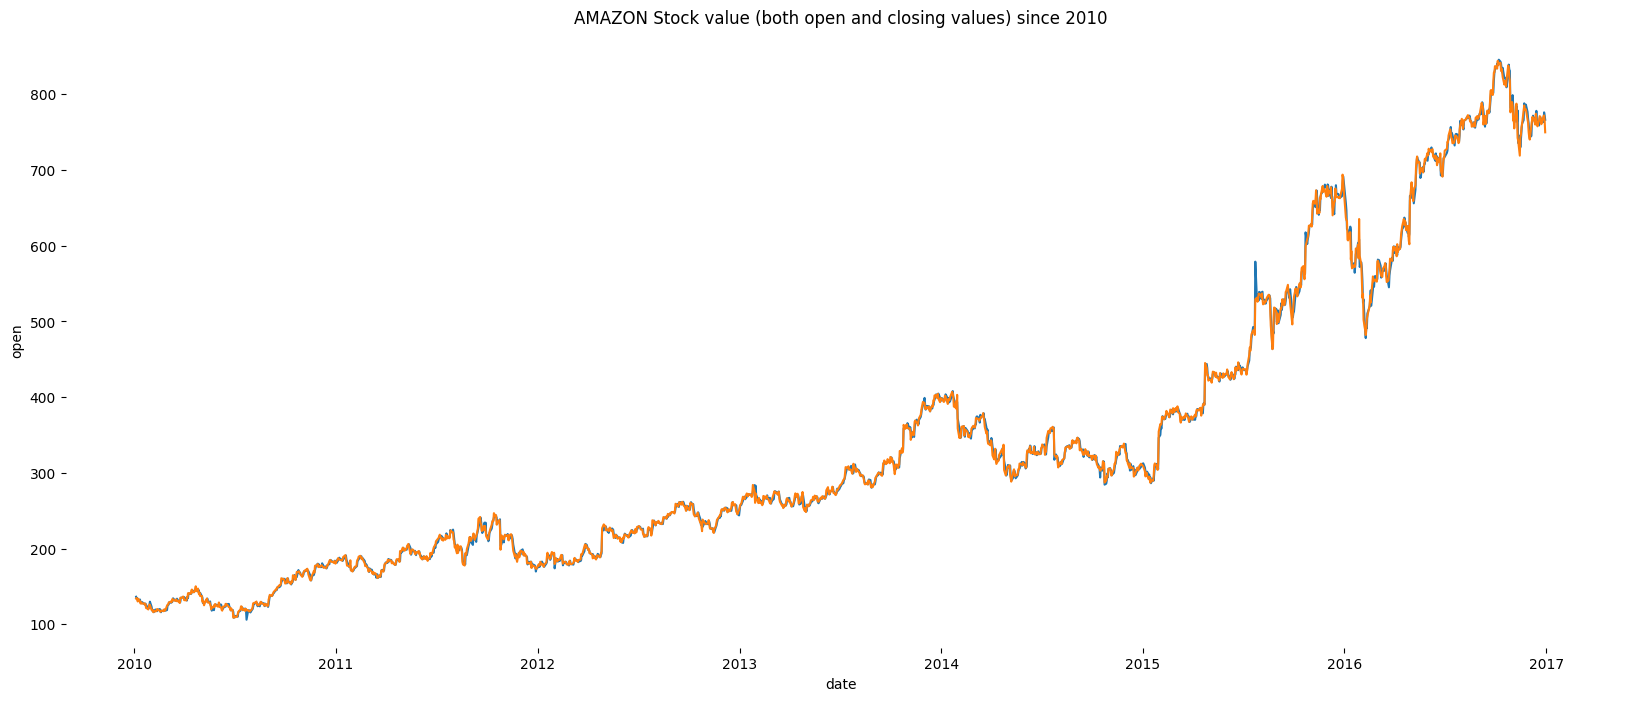

In [ ]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df1, x='date',y='open')
ax=sns.lineplot(data=df1, x='date',y='close')
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

plt.title("AMAZON Stock value (both open and closing values) since 2010")

Text(0.5, 1.0, 'AMZN Stock volume')

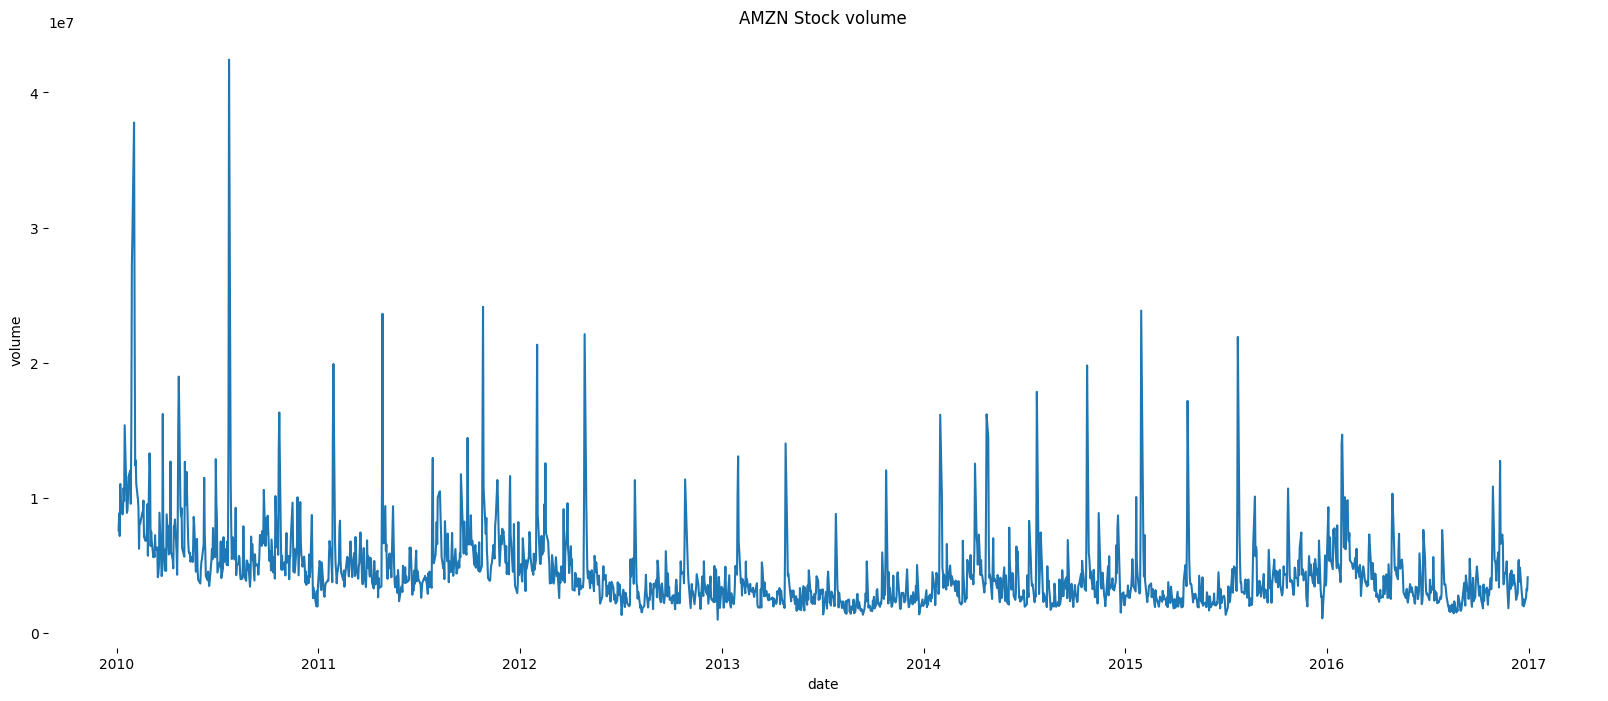

In [ ]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df1, x='date',y='volume')
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)
plt.title("AMZN Stock volume")

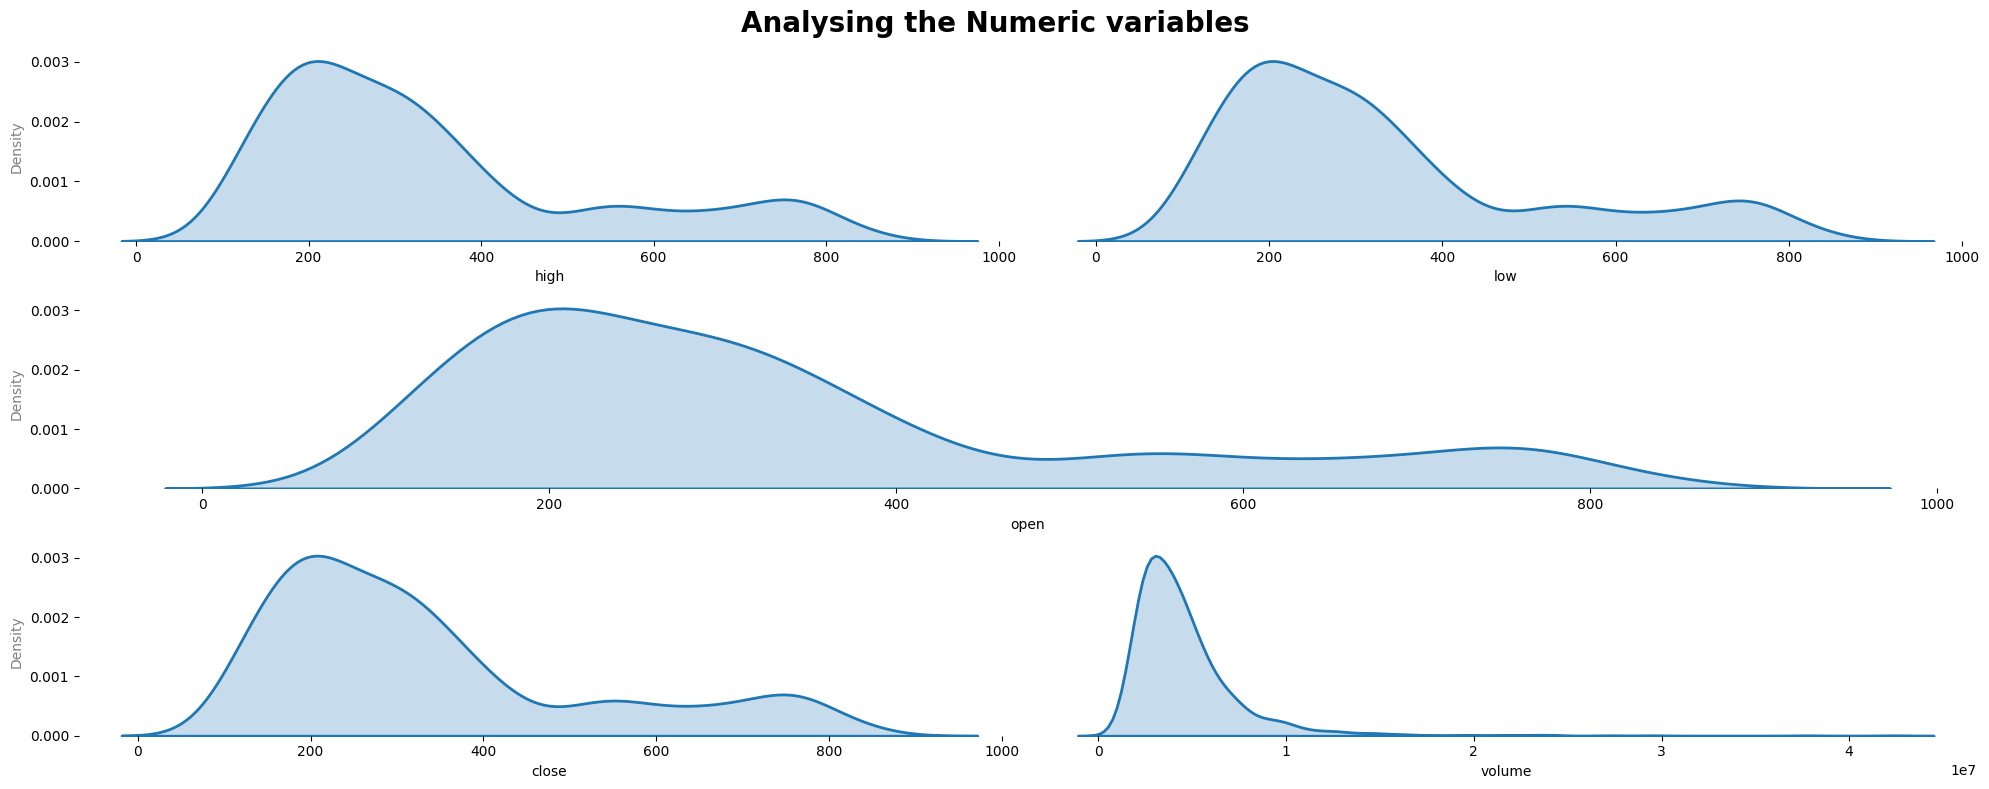

In [ ]:
#integer columns
fig=plt.figure(figsize=(20,8), tight_layout=True)
plt.suptitle("Analysing the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.kdeplot(df1['high'], ax=ax['A'], fill=True, linewidth=2)
sns.kdeplot(df1['low'], ax=ax['B'],fill=True, linewidth=2)
sns.kdeplot(df1['open'], ax=ax['C'],fill=True, linewidth=2)
sns.kdeplot(df1['close'], ax=ax['D'],fill=True, linewidth=2)
sns.kdeplot(df1['volume'], ax=ax['E'],fill=True, linewidth=2)
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

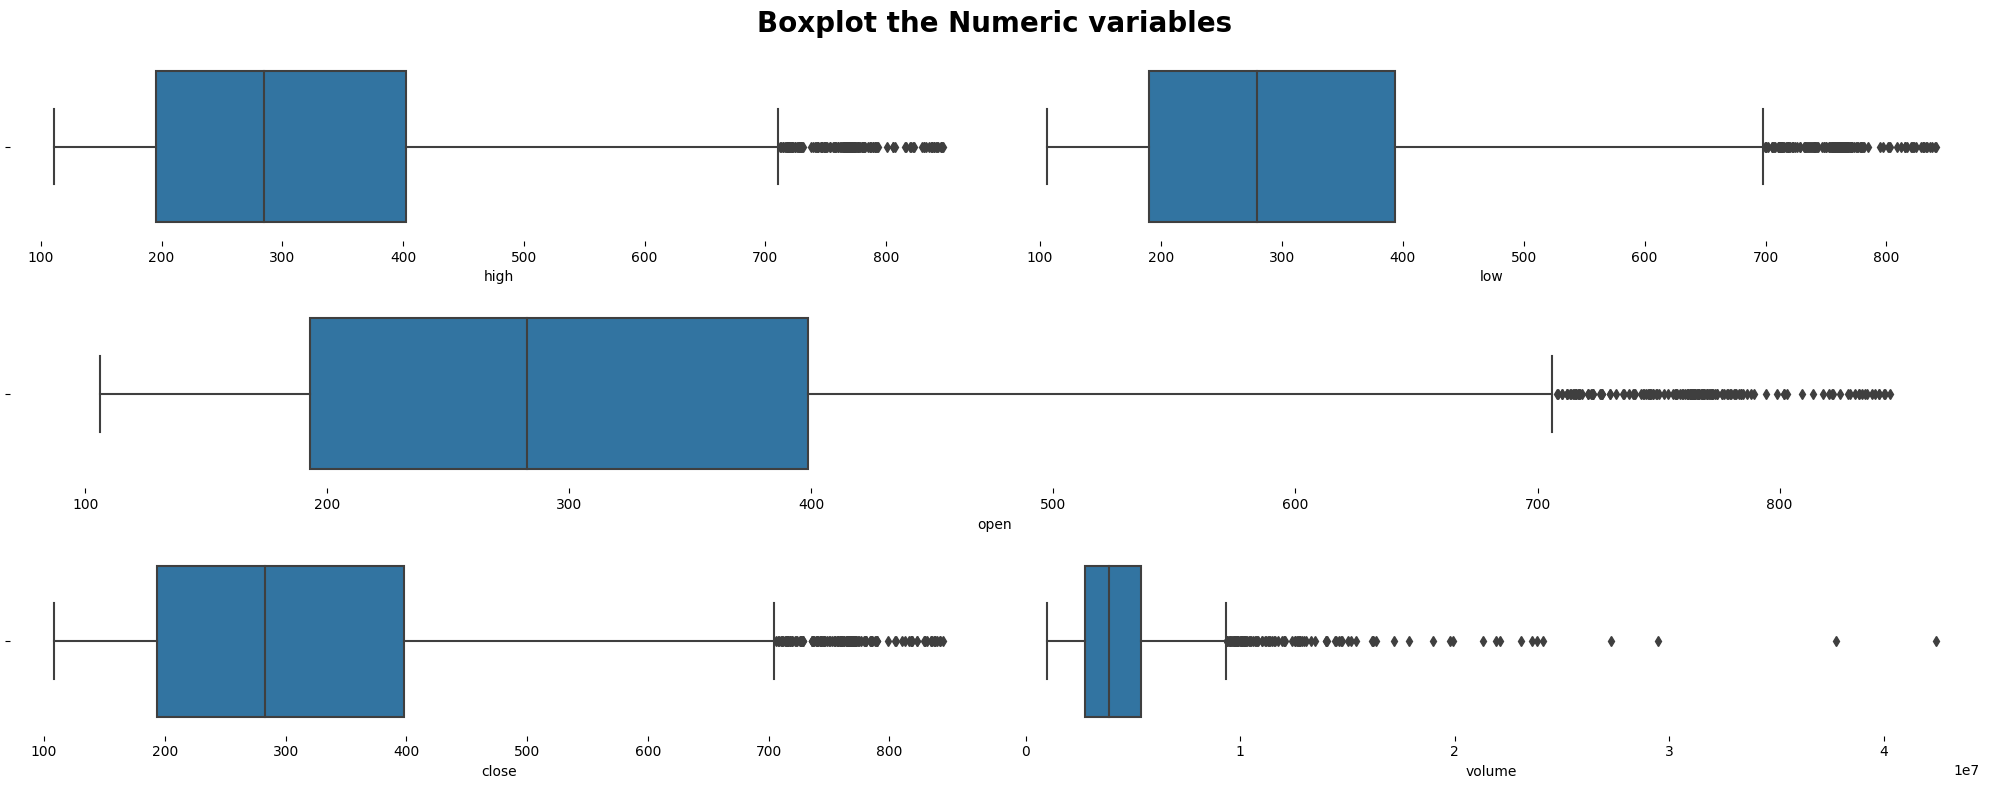

In [ ]:
#integer columns
fig=plt.figure(figsize=(20,8), tight_layout=True)
plt.suptitle("Boxplot the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                        CC
                        DE""")
sns.boxplot(data = df1,x=df1['high'], ax=ax['A'])
sns.boxplot(data = df1,x=df1['low'], ax=ax['B'])
sns.boxplot(data = df1,x=df1['open'], ax=ax['C'])
sns.boxplot(data = df1,x=df1['close'], ax=ax['D'])
sns.boxplot(data = df1,x=df1['volume'], ax=ax['E'])
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

It is common to have outliers in stock data as some times the stock gets peak values which will be higher than other values. so we are considering all the outliers as well

In [ ]:
df1.drop(['symbol'], axis=1, inplace=True)

<ipython-input-21-8be285d728fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['symbol'], axis=1, inplace=True)


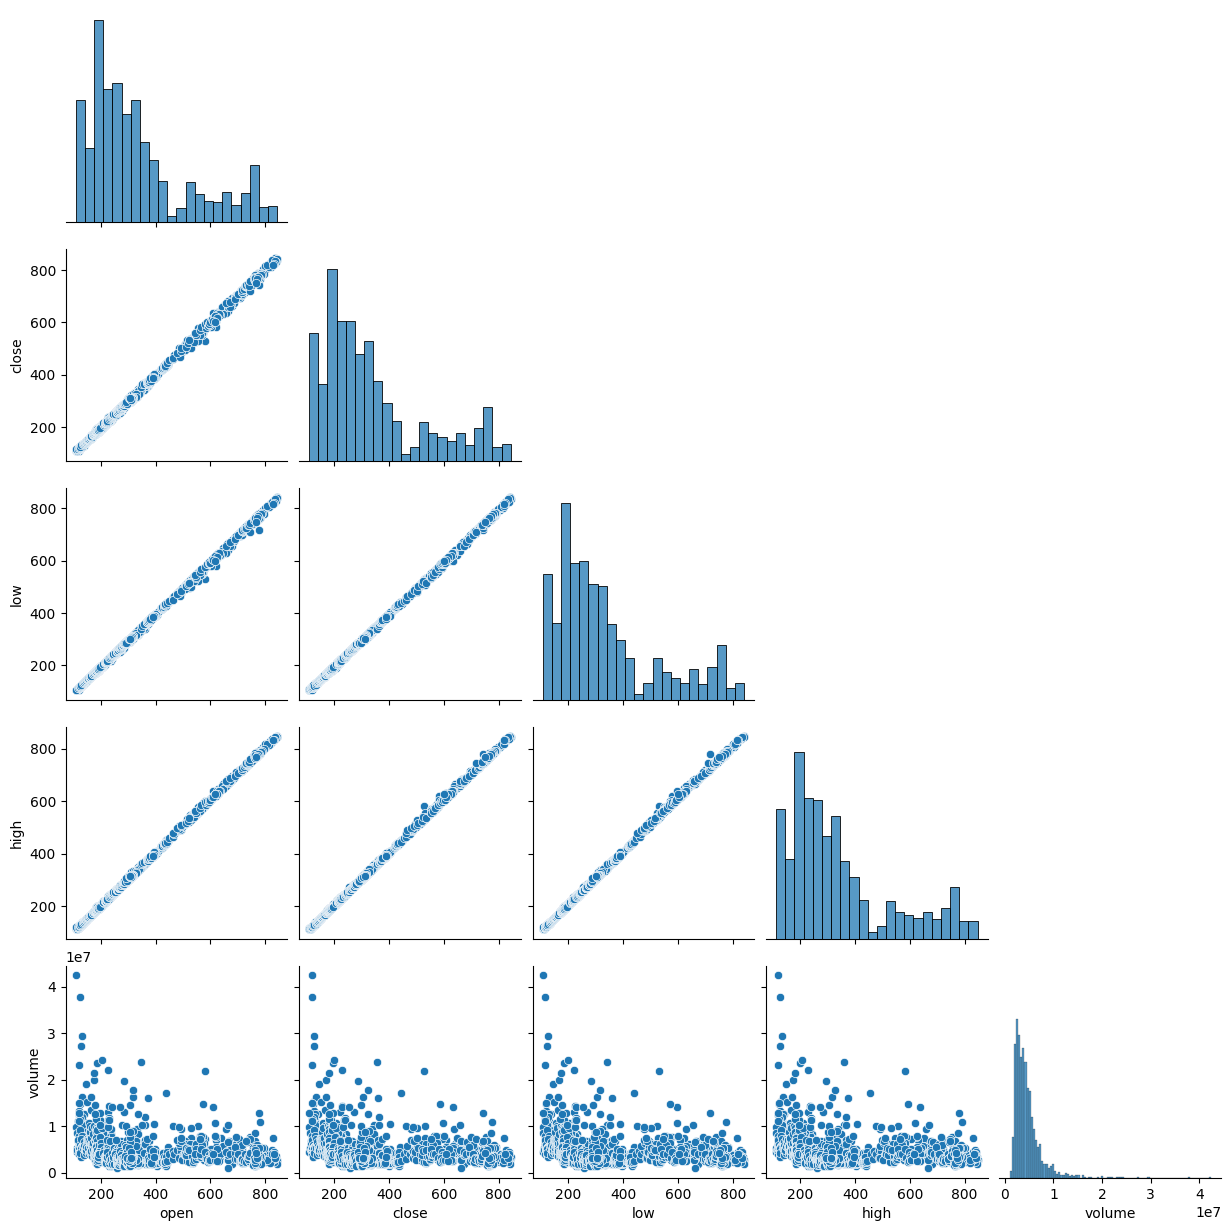

In [ ]:
# we need to predict the closing price of the stock, lets us consider 'Close' feature as the Target variable. 
sns.pairplot(df1,corner=True)

In [ ]:
df1.corr()['close']

<ipython-input-23-dcc43f1af46d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()['close']


open      0.999581
close     1.000000
low       0.999832
high      0.999811
volume   -0.238560
Name: close, dtype: float64

In [ ]:
#df1.dtypes
int_cols=df1.select_dtypes(exclude = 'datetime64[ns]').columns.to_list()
print(int_cols)

['open', 'close', 'low', 'high', 'volume']


In [ ]:
from scipy.stats import levene, shapiro

for i in int_cols:
    _, p_value=shapiro(df1[i])
    if p_value<0.05:
        print("Feature {} is normaly distributed".format(i))
    else:
        print("Feature {} is not normaly distributed".format(i))
        
    print("Normalitiy test p_value for featue -  {} is {}".format(i,np.round(p_value,3)))

Feature open is normaly distributed
Normalitiy test p_value for featue -  open is 0.0
Feature close is normaly distributed
Normalitiy test p_value for featue -  close is 0.0
Feature low is normaly distributed
Normalitiy test p_value for featue -  low is 0.0
Feature high is normaly distributed
Normalitiy test p_value for featue -  high is 0.0
Feature volume is normaly distributed
Normalitiy test p_value for featue -  volume is 0.0


<ipython-input-26-720554e38ce2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, linecolor='white', linewidth=2 )


<Axes: >

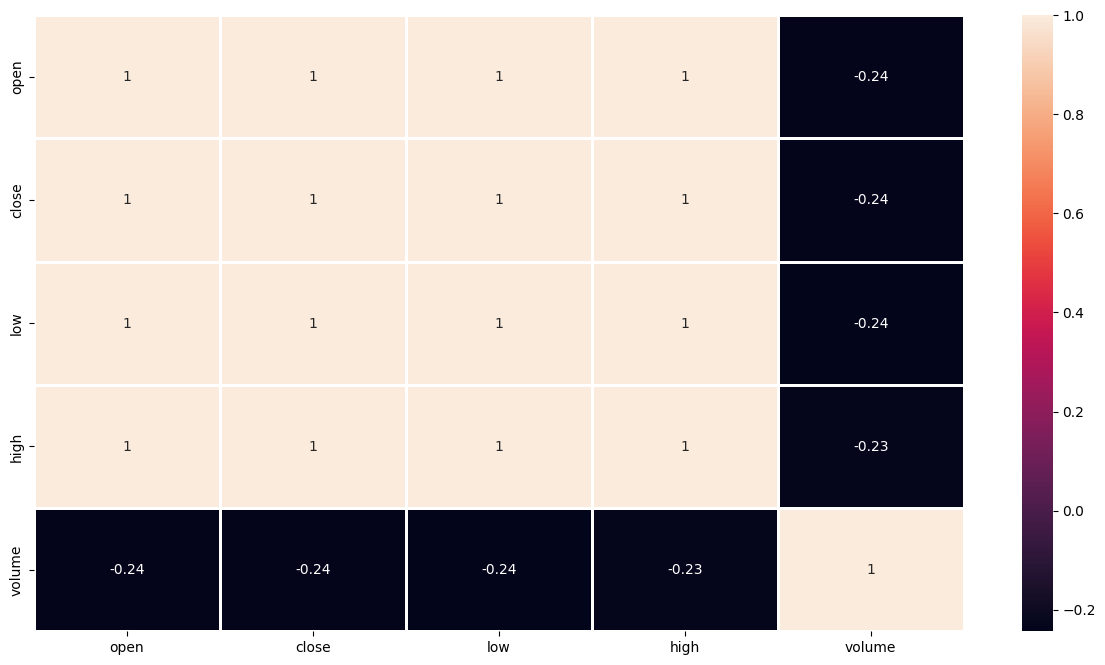

In [ ]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(), annot=True, linecolor='white', linewidth=2 )

feature Open, high, low are highly correlated to Target feature Close. we can use either one of the feature for prediction to avoid multicollinearity

In [ ]:
X=df1[['volume','open']]
y=df1['close']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1409, 2), (353, 2), (1409,), (353,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

***Linear regression model***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
model = LinearRegression()
model.fit(X_train,y_train)
set_config(display='diagram')
pred=model.predict(X_test)
sc=model.score(X_test,y_test) * 100
r2=r2_score(y_test,pred)
mse=mean_squared_error(y_test,pred)
mae=mean_squared_error(y_test,pred)
print(sc)
print(r2)

99.159693423018
0.9915969342301799


Text(800000, 540, 'Mean Absolute error : 83.14600719100417')

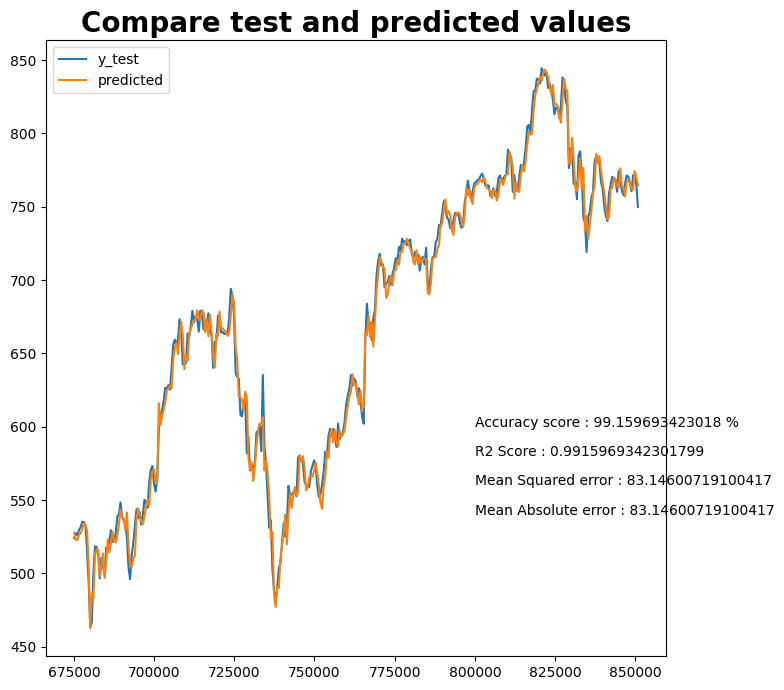

In [ ]:
fig=plt.figure(figsize=(8,8))
p=pd.Series(pred, index=y_test.index)
plt.plot(y_test)
plt.plot(p)
plt.legend(['y_test','predicted'])
plt.title("Compare test and predicted values", size=20, weight='bold')
plt.text(x=800000, y=600,s='Accuracy score : {} %'.format(sc))
plt.text(x=800000, y=580,s='R2 Score : {}'.format(r2))
plt.text(x=800000, y=560,s='Mean Squared error : {}'.format(mse))
plt.text(x=800000, y=540,s='Mean Absolute error : {}'.format(mae))

**XGB Model**

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
# fit the model
xgb.fit(X_train, y_train)
# predict the model
y_pred = xgb.predict(X_test)
# evaluate the model
sc_1=xgb.score(X_test, y_test) * 100
r2_score = r2_score(y_test, y_pred)
# print the score
print(sc_1)
print('R2 Score: %.2f' % (r2_score))

-187.47499516713327
R2 Score: -1.87


Text(800000, 580, 'R2 Score : -1.8747499516713328')

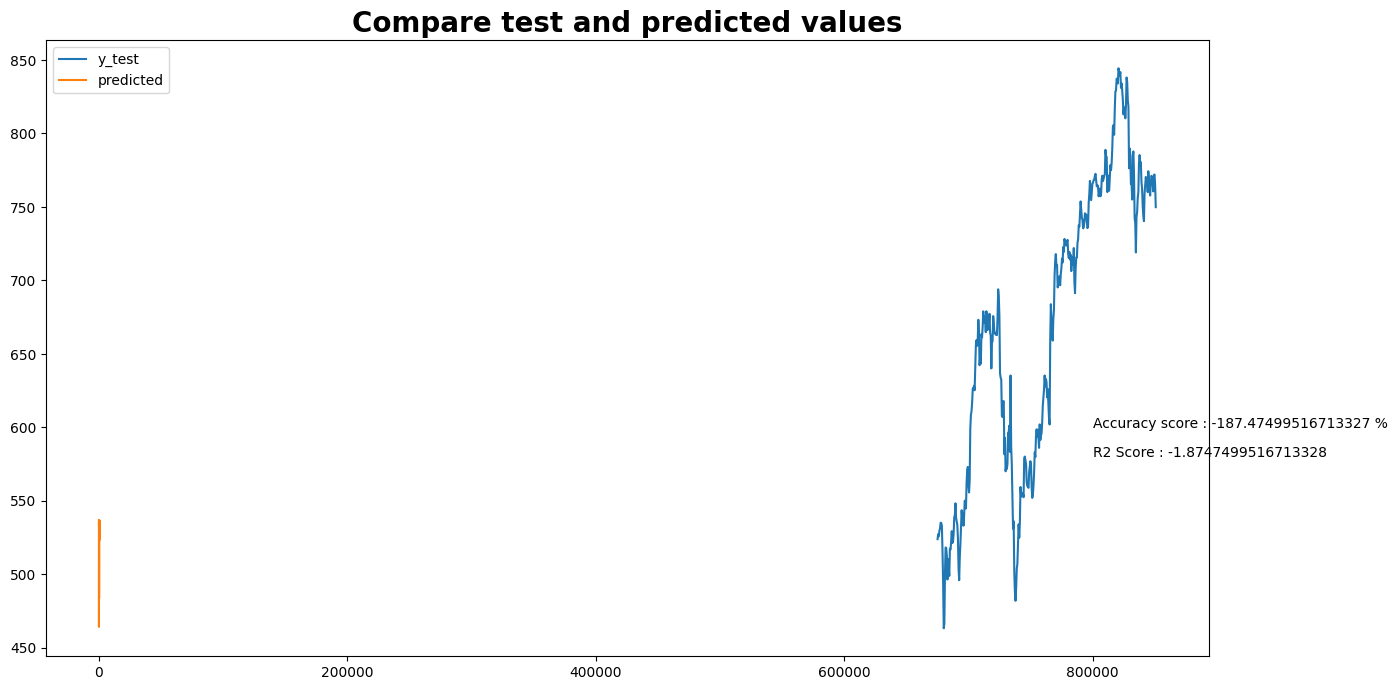

In [ ]:
# plot the predicted values and the actual values
plt.figure(figsize=(15,8))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['y_test','predicted'])
plt.title("Compare test and predicted values", size=20, weight='bold')
plt.text(x=800000, y=600,s='Accuracy score : {} %'.format(sc_1))
plt.text(x=800000, y=580,s='R2 Score : {}'.format(r2_score))

# **ANN Model**

**We create a Sequantial model**

**add layers via the .add() method**

**Pass an input_dim argument to the first layer.**

**The activation function is the Rectified Linear Unit- Relu.**

**Configure the learning process, which is done via the compile method.**

**A loss function is mean_squared_error , and An optimizer is adam.**

**Stop training when a monitored loss has stopped improving.**

**patience=2, indicate number of epochs with no improvement after which training will be stopped.**

**The ANN is trained for 10 epochs and a batch size of 300 is used.**

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset


# Select the features to use for prediction
features = ['open', 'close', 'high', 'low', 'volume']
data = df1[features].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Define the number of time steps and the size of the training and test sets
num_time_steps = 60
train_size = int(0.8 * len(data))
test_size = len(data) - train_size

# Create the training and test sets
X_train = []
y_train = []
for i in range(num_time_steps, train_size):
    X_train.append(data[i-num_time_steps:i])
    y_train.append(data[i, 1]) # Use Close price as the target variable
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(train_size, len(data)):
    X_test.append(data[i-num_time_steps:i])
    y_test.append(data[i, 1]) # Use Close price as the target variable
X_test, y_test = np.array(X_test), np.array(y_test)

# Build the model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(num_time_steps, len(features))))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=300)

y_pred_ann = model.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)

Epoch 1/10
5/5 [==============================] - 2s 64ms/step - loss: 0.0710 - accuracy: 7.4129e-04
Epoch 2/10
5/5 [==============================] - 0s 53ms/step - loss: 0.0489 - accuracy: 7.4129e-04
Epoch 3/10
5/5 [==============================] - 0s 62ms/step - loss: 0.0314 - accuracy: 7.4129e-04
Epoch 4/10
5/5 [==============================] - 0s 64ms/step - loss: 0.0190 - accuracy: 7.4129e-04
Epoch 5/10
5/5 [==============================] - 0s 55ms/step - loss: 0.0154 - accuracy: 7.4088e-04
Epoch 6/10
5/5 [==============================] - 0s 50ms/step - loss: 0.0170 - accuracy: 7.4051e-04
Epoch 7/10
5/5 [==============================] - 0s 56ms/step - loss: 0.0162 - accuracy: 7.4071e-04
Epoch 8/10
5/5 [==============================] - 0s 77ms/step - loss: 0.0149 - accuracy: 7.4129e-04
Epoch 9/10
5/5 [==============================] - 0s 84ms/step - loss: 0.0150 - accuracy: 7.4129e-04
Epoch 10/10
12/12 [==============================] - 0s 4ms/step


In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

12/12 [==============================] - 0s 5ms/step - loss: 0.2043 - accuracy: 0.0000e+00
Test loss: [0.20425865054130554, 0.0]
